# Demo of Canny Edge Detection and Hough Transform

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2

import warnings

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

warnings.filterwarnings('ignore')

# Load image

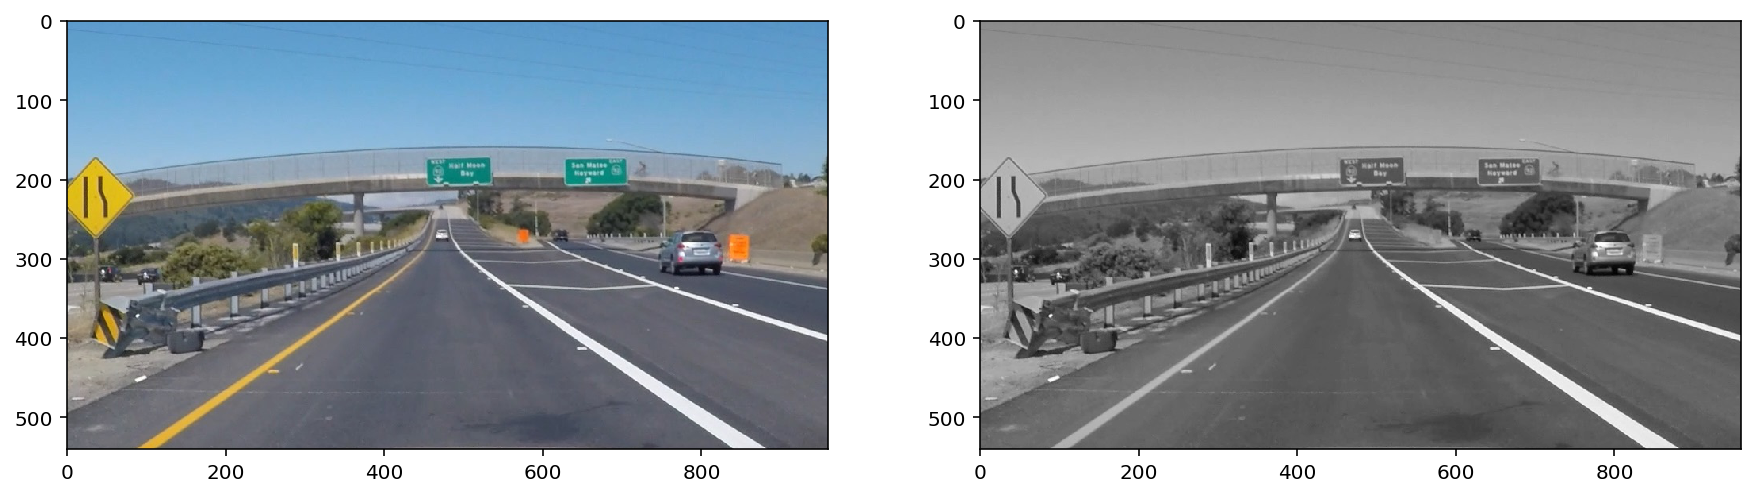

In [17]:
image = mpimg.imread('exit-ramp.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# Display image
fig = plt.figure(figsize=(15,6))
fig.add_axes()
ax1 = fig.add_subplot(121)
ax1.imshow(image)
# ax1.add_title('Original Image')
ax2 = fig.add_subplot(122)
ax2.imshow(gray, cmap='gray')
# ax2.add_title('Gray-scaled image')

# Gaussian Blur (smoothing)

Text(0.5,1,'Gaussian Blurring')

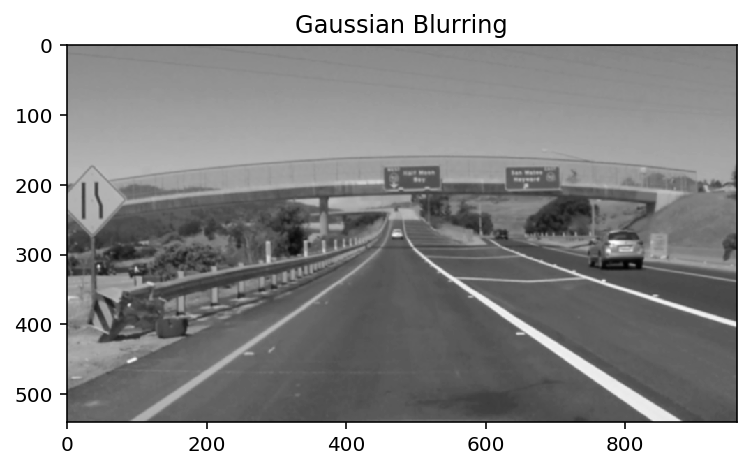

In [24]:
kernel_size = 5      # must be odd number
blur_gray = cv2.GaussianBlur(gray, (kernel_size, kernel_size), 0)
plt.imshow(blur_gray, cmap='gray')
plt.title('Gaussian Blurring')

# Canny Edge Detection
To find edges

Text(0.5,1,'Canny Edge')

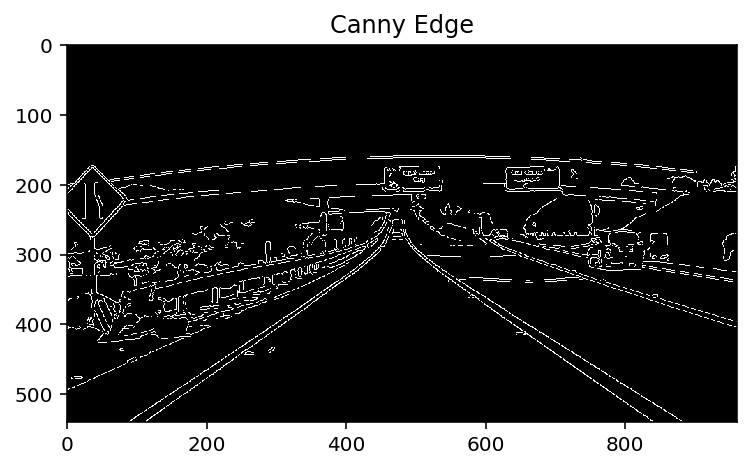

In [23]:
low_thresh = 50
high_thresh = 150
edges = cv2.Canny(blur_gray, low_thresh, high_thresh)
plt.imshow(edges, cmap='gray')
plt.title('Canny Edge')

Text(0.5,1,'Masked Edges')

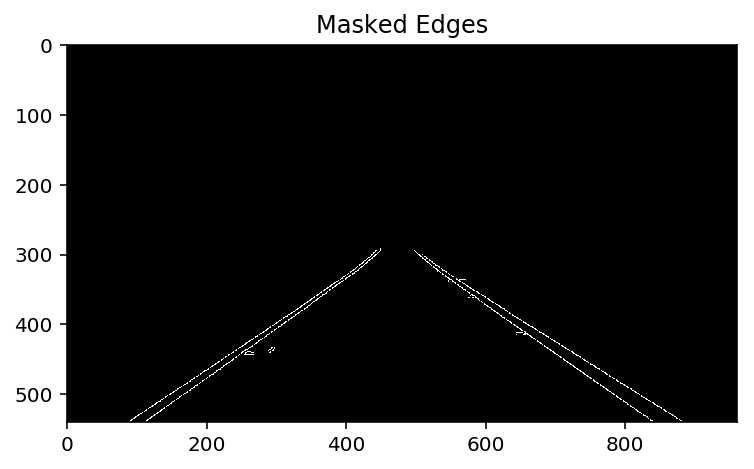

In [36]:
# Now create a masked-edges image using cv2.fillPoly()
mask = np.zeros_like(edges)
ignore_mask_color = 255

# Define a 4-sided polygon to mask
imshape = image.shape
vertices = np.array([[(0,imshape[0]), (450,290), (490,290), (imshape[1],imshape[0])]], dtype=np.int32)
cv2.fillPoly(mask, vertices, ignore_mask_color)

masked_edges = cv2.bitwise_and(edges, mask)
plt.imshow(masked_edges, cmap='gray')
plt.title('Masked Edges')

# Hough Transform

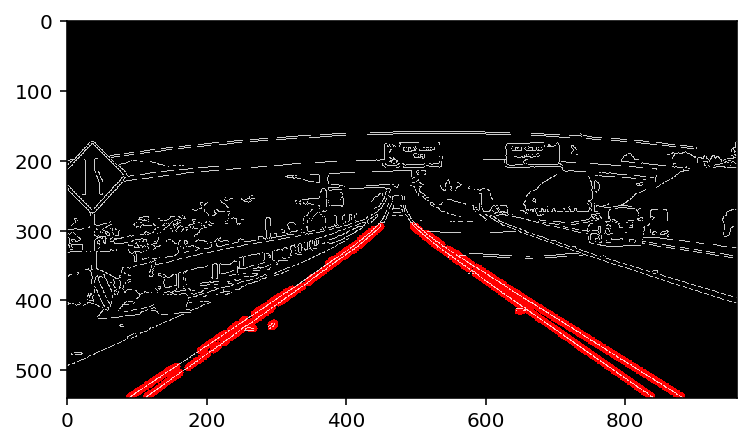

In [37]:
rho = 1 # distance resolution in pixels of the Hough grid
theta = np.pi/180 # angular resolution in radians of the Hough grid
threshold = 1     # minimum number of votes (intersections in Hough grid cell)
min_line_length = 5 #minimum number of pixels making up a line
max_line_gap = 1    # maximum gap in pixels between connectable line segments
line_image = np.copy(image)*0 # creating a blank to draw lines on

# Run Hough on edge-detected image
# output 'lines' is an array containing endpoints of detected line segments
lines = cv2.HoughLinesP(masked_edges, rho, theta, threshold, np.array([]), min_line_length, max_line_gap)

# Iterate over the 'lines' to draw lines on a blank image
for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(line_image, (x1,y1), (x2,y2), (255,0,0), 10)
        
# Create a 'color' binary image to combine with line image since currently, 'edges' is 2D only
color_edges = np.dstack((edges, edges, edges))

# Draw lines on the line image
lines_edges = cv2.addWeighted(color_edges, 0.8, line_image, 1, 0)
plt.imshow(lines_edges)